<a href="https://colab.research.google.com/github/austinj42/Machine-Learning-to-Read-Handwritten-Digits/blob/master/ReadHandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('mnist.mat')

--2020-03-14 22:49:04--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2020-03-14 22:49:04--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14278089 (14M) [application/octet-stream]
Saving to: ‘mnist.mat.1’

mnist.mat.1         100%[===================>]  13.62M  --.-KB/s    in 0.1s    

2020-03-14 22:49:04 (93.9 MB/s) - ‘mnist.mat.1’ saved [14278089/14278089]



# **Put testing and training sets into arrays**

In [0]:
#import test and training sets
trainX = mat["trainX"]
testX = mat["testX"]
trainY = mat["trainY"]
testY = mat["testY"]

#convert sets to numpy format
trainX = np.array(trainX, dtype=float)
testX = np.array(testX, dtype=float)

trainY = np.array(trainY, dtype=float)
testY = np.array(testY, dtype=float)

# **Define Euclidean and Cos functions**

In [0]:
#define euclidean distance formula
def euclidean(x, y):
  return np.sqrt(np.sum((x - y) ** 2))

#define cosine distance formula
def cos(x, y):
  return 1- np.dot(x, y)/(np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

# **Base euclidean test case using 500 tests and all training samples**

In [0]:
#Set number of tests and training data to be used for euclidean distance
testsUsed = 500
trainUsed = 60000
#empty array to store accuracy counts
accuracyEucl = np.zeros((10,10))

#loop through all test numbers
for num in range(0,testsUsed):
  #variables to hold the minimum index and minimum distance training item
  minIxEucl = 0;
  #set first min to the euclidean distance of the first item
  minAmountEucl = euclidean(testX[num,:], trainX[0,:])
  #for every training item compute the euclidean distance from the current test
  #item
  for ix in range(0, trainUsed):
    #compute euclidean distance of the current training item
    euclCheck = euclidean(testX[num,:], trainX[ix,:])
    #if the item's euclidean distance is less than the current min set new min
    if(euclCheck < minAmountEucl):
      minAmountEucl = euclCheck
      minIxEucl = ix
  #the predicted item is selected using the number represented by the min index
  pred = int(trainY[0,minIxEucl])
  #ground truth
  gt = int(testY[0,num])
  #accuracy matrix is filled, counting each correct selection and also counting 
  #errors in predictions
  accuracyEucl[gt,pred] +=1

96.6


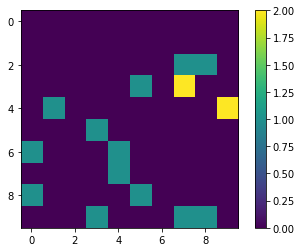

In [0]:
#create new empty matrix
actualAcc = np.zeros((10,10))
for i in range(10):
  for j in range(10):
    #if i and j are not equal, and a value > 1 is present, then the prediction
    #is incorrect, this is placed in the new accuracy matrix
    if(i!=j):
      actualAcc[i][j] = accuracyEucl[i][j]
#The new accuracy matrix is used to create a confusion matrix
plt.imshow(actualAcc)
plt.colorbar()
#print out overall accuracy of all testing
print((np.trace(accuracyEucl)/testsUsed)*100)

# **Base Cos test case using 500 tests and all training samples**

In [0]:
#Set number of tests and training data to be used for cosine distance
testsUsed = 500
trainUsed = 60000
#empty array to store accuracy counts
accuracyCos = np.zeros((10,10))
#loop through all test numbers
for num in range(0,testsUsed):
  #variables to hold the minimum index and minimum distance training item
  minIx = 0;
  #set first min to the cosine distance of the first item
  minAmount = cos(testX[num,:], trainX[0,:])
  #for every training item compute the cosine distance 
  #from the current test item
  for ix in range(0,trainUsed):
    #compute cosine distance of the current training item
    cosCheck = cos(testX[num,:], trainX[ix,:])
    #if the item's cosine distance is less than the current min set new min
    if(cosCheck < minAmount):
      minAmount = cosCheck
      minIx = ix
  #the predicted item is selected using the number represented by the min index
  pred = int(trainY[0,minIx])
  #ground truth
  gt = int(testY[0,num])
  #accuracy matrix is filled, counting each correct selection and also counting 
  #errors in predictions
  accuracyCos[gt,pred] +=1

97.2


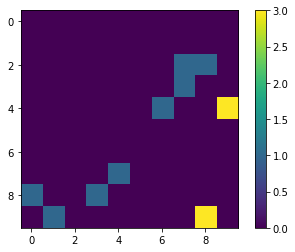

In [0]:
#create new empty matrix
actualAcc = np.zeros((10,10))
for i in range(10):
  for j in range(10):
    #if i and j are not equal, and a value > 1 is present, then the prediction
    #is incorrect, this is placed in the new accuracy matrix
    if(i!=j):
      actualAcc[i][j] = accuracyCos[i][j]
#The new accuracy matrix is used to create a confusion matrix
plt.imshow(actualAcc)
plt.colorbar()
#print out overall accuracy of all testing
print((np.trace(accuracyCos)/testsUsed)*100)

# **Accuracy as a number of training samples, fixed 200 test samples Euclidean:**

In [0]:
#using only 200 testing items, compute euclidean distance accuracy based off of 
#increasing training items
testsUsed = 200
#accuracy matrix for all tests
accuracyIndexEucl200 = np.zeros((50,2))
#using increments of 100, compute euclidean distance accuracy for each
#amount of training samples
for trials in range(0, 5000):
  if(trials%100 == 0):
    #accuracy matrix for current trainig amount
    accuracyEucl = np.zeros((10,10))
    #set training amount for current test
    trainUsed = trials
    #Same function as above to compute accuracy for current
    #training amount
    for num in range(0,testsUsed):
      minIxEucl = 0;
      minAmountEucl = euclidean(testX[num,:], trainX[0,:])
      for ix in range(0, trainUsed):
        euclCheck = euclidean(testX[num,:], trainX[ix,:])
        if(euclCheck < minAmountEucl):
          minAmountEucl = euclCheck
          minIxEucl = ix
      pred = int(trainY[0,minIxEucl])
      gt = int(testY[0,num])
      accuracyEucl[gt,pred] +=1
    #overall accuracy matrix updated to hold current accuracy
accuracyIndexEucl200[int(trials/100)] = ((np.trace(accuracyEucl)/testsUsed)*100)

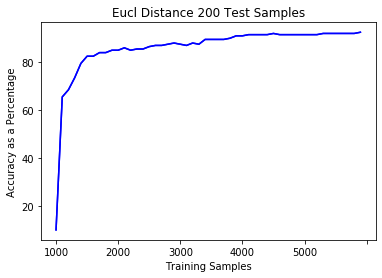

In [0]:
#plot all accuracies computed
fix, ax = plt.subplots(1,1)
ax.set_xticklabels([0,1000,2000,3000,4000,5000])
ax.set_title("Eucl Distance 200 Test Samples")
ax.set_xlabel("Training Samples")
ax.set_ylabel("Accuracy as a Percentage")
ax.plot(accuracyIndexEucl200, 'b-')

# **Accuracy as a number of training samples, fixed 200 test samples Cos:**

In [0]:
#using only 200 testing items, compute cosine distance accuracy based off of 
#increasing training items
testsUsed = 200
#accuracy matrix for all tests
accuracyIndexCos200 = np.zeros((50,2))
#using increments of 100, compute cosine distance accuracy for each
#amount of training samples
for trials in range(0, 5000):
  if(trials%100 == 0):
    #accuracy matrix for current training amount
    accuracyCos = np.zeros((10,10))
    #set training amount for current test
    trainUsed = trials
    #Same function as above to compute accuracy for current
    #training amount
    for num in range(0,testsUsed):
      minIxCos = 0;
      minAmountCos = cos(testX[num,:], trainX[0,:])
      for ix in range(0, trainUsed):
        cosCheck = cos(testX[num,:], trainX[ix,:])
        if(cosCheck < minAmountCos):
          minAmountCos = cosCheck
          minIxCos = ix
      pred = int(trainY[0,minIxCos])
      gt = int(testY[0,num])
      accuracyCos[gt,pred] +=1
    #overall accuracy matrix updated to hold current accuracy
    accuracyIndexCos200[int(trials/100)] = ((np.trace(accuracyCos)/testsUsed)*100)

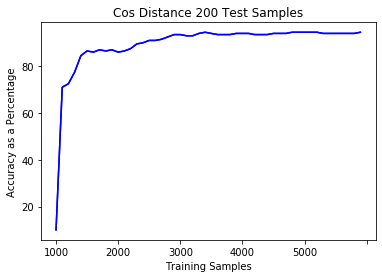

In [0]:
#plot all accuracies computed
fix, ax = plt.subplots(1,1)
ax.set_xticklabels([0,1000,2000,3000,4000,5000])
ax.set_title("Cos Distance 200 Test Samples")
ax.set_xlabel("Training Samples")
ax.set_ylabel("Accuracy as a Percentage")
ax.plot(accuracyIndexCos200, 'b-')

# **Accuracy as a number of Testing samples, fixed 500 training samples Euclidean:**

In [0]:
#using only 500 training items, compute euclidean distance accuracy based off of 
#increasing testing items
#this is the same code as above, but instead of increasing the amount of
#training items used the amount of testing items used icreases instead
trainUsed = 500
accuracyIndexEucl500 = np.zeros((50,2))
for trials in range(0, 5000):
  if(trials%100 == 0):
    accuracyEucl = np.zeros((10,10))
    testsUsed = trials
    for num in range(0,testsUsed):
      minIxEucl = 0;
      minAmountEucl = euclidean(testX[num,:], trainX[0,:])
      for ix in range(0, trainUsed):
        euclCheck = euclidean(testX[num,:], trainX[ix,:])
        if(euclCheck < minAmountEucl):
          minAmountEucl = euclCheck
          minIxEucl = ix
      pred = int(trainY[0,minIxEucl])
      gt = int(testY[0,num])
      accuracyEucl[gt,pred] +=1
    accuracyIndexEucl500[int(trials/100)] = ((np.trace(accuracyEucl)/testsUsed)*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


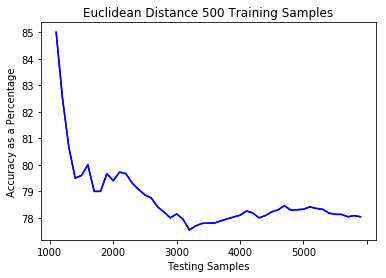

In [0]:
fix, ax = plt.subplots(1,1)
ax.set_xticklabels([0,1000,2000,3000,4000,5000])
ax.set_title("Euclidean Distance 500 Training Samples")
ax.set_xlabel("Testing Samples")
ax.set_ylabel("Accuracy as a Percentage")
ax.plot(accuracyIndexEucl500, 'b-')

# **Accuracy as a number of Testing samples, fixed 500 training samples Cos:**

In [0]:
#using only 500 training items, compute cosine distance accuracy based off of 
#increasing testing items
#this is the same code as above, but instead of increasing the amount of
#training items used the amount of testing items used icreases instead
trainUsed = 500
accuracyIndexCos500 = np.zeros((50,2))
for trials in range(0, 5000):
  if(trials%100 == 0):
    accuracyCos = np.zeros((10,10))
    testsUsed = trials
    for num in range(0,testsUsed):
      minIxCos = 0;
      minAmountCos = cos(testX[num,:], trainX[0,:])
      for ix in range(0, trainUsed):
        cosCheck = cos(testX[num,:], trainX[ix,:])
        if(cosCheck < minAmountCos):
          minAmountCos = cosCheck
          minIxCos = ix
      pred = int(trainY[0,minIxCos])
      gt = int(testY[0,num])
      accuracyCos[gt,pred] +=1
    accuracyIndexCos500[int(trials/100)] = ((np.trace(accuracyCos)/testsUsed)*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


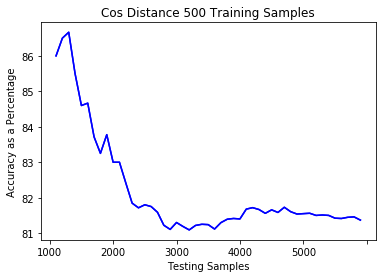

In [0]:
fix, ax = plt.subplots(1,1)
ax.set_xticklabels([0,1000,2000,3000,4000,5000])
ax.set_title("Cos Distance 500 Training Samples")
ax.set_xlabel("Testing Samples")
ax.set_ylabel("Accuracy as a Percentage")
ax.plot(accuracyIndexCos500, 'b-')